In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D 

In [58]:
##give path for the data set
df = pd.read_csv("Mall_Customers.csv")

In [59]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [61]:
df.shape

(200, 5)

In [62]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [63]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [64]:
df.dropna(inplace=True)

In [65]:
if "Gender" in df.columns:
    le = LabelEncoder()
    df["Gender"] = le.fit_transform(df["Gender"])

In [66]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25) 
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return df[(df[col]>=lower) & (df[col]<=upper)]

features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
numeric_cols = [c for c in features if c in df.columns]
for col in numeric_cols:
    df = remove_outliers(df, col)

In [67]:
X = df.iloc[:,1:4].values

In [69]:
print(X)

[[  1  19  15]
 [  1  21  15]
 [  0  20  16]
 [  0  23  16]
 [  0  31  17]
 [  0  22  17]
 [  0  35  18]
 [  0  23  18]
 [  1  64  19]
 [  0  30  19]
 [  1  67  19]
 [  0  35  19]
 [  0  58  20]
 [  0  24  20]
 [  1  37  20]
 [  1  22  20]
 [  0  35  21]
 [  1  20  21]
 [  1  52  23]
 [  0  35  23]
 [  1  35  24]
 [  1  25  24]
 [  0  46  25]
 [  1  31  25]
 [  0  54  28]
 [  1  29  28]
 [  0  45  28]
 [  1  35  28]
 [  0  40  29]
 [  0  23  29]
 [  1  60  30]
 [  0  21  30]
 [  1  53  33]
 [  1  18  33]
 [  0  49  33]
 [  0  21  33]
 [  0  42  34]
 [  0  30  34]
 [  0  36  37]
 [  0  20  37]
 [  0  65  38]
 [  1  24  38]
 [  1  48  39]
 [  0  31  39]
 [  0  49  39]
 [  0  24  39]
 [  0  50  40]
 [  0  27  40]
 [  0  29  40]
 [  0  31  40]
 [  0  49  42]
 [  1  33  42]
 [  0  31  43]
 [  1  59  43]
 [  0  50  43]
 [  1  47  43]
 [  0  51  44]
 [  1  69  44]
 [  0  27  46]
 [  1  53  46]
 [  1  70  46]
 [  1  19  46]
 [  0  67  47]
 [  0  54  47]
 [  1  63  48]
 [  1  18  48]
 [  0  43 

In [70]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [78]:
print(X_scaled)

[[ 1.1411948  -1.42541358 -1.77917141]
 [ 1.1411948  -1.2823665  -1.77917141]
 [-0.87627458 -1.35389004 -1.73944701]
 [-0.87627458 -1.13931942 -1.73944701]
 [-0.87627458 -0.5671311  -1.69972262]
 [-0.87627458 -1.21084296 -1.69972262]
 [-0.87627458 -0.28103694 -1.65999822]
 [-0.87627458 -1.13931942 -1.65999822]
 [ 1.1411948   1.79314572 -1.62027383]
 [-0.87627458 -0.63865464 -1.62027383]
 [ 1.1411948   2.00771635 -1.62027383]
 [-0.87627458 -0.28103694 -1.62027383]
 [-0.87627458  1.36400448 -1.58054943]
 [-0.87627458 -1.06779588 -1.58054943]
 [ 1.1411948  -0.13798986 -1.58054943]
 [ 1.1411948  -1.21084296 -1.58054943]
 [-0.87627458 -0.28103694 -1.54082504]
 [ 1.1411948  -1.35389004 -1.54082504]
 [ 1.1411948   0.93486324 -1.46137625]
 [-0.87627458 -0.28103694 -1.46137625]
 [ 1.1411948  -0.28103694 -1.42165185]
 [ 1.1411948  -0.99627234 -1.42165185]
 [-0.87627458  0.505722   -1.38192745]
 [ 1.1411948  -0.5671311  -1.38192745]
 [-0.87627458  1.07791032 -1.26275427]
 [ 1.1411948  -0.71017818

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [71]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init ="auto", random_state=42)
  kmeans.fit(X_scaled)

  wcss.append(kmeans.inertia_)

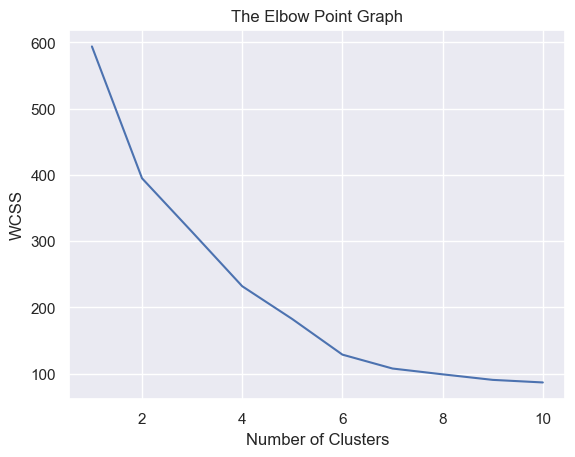

In [72]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [73]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init = "auto", random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X_scaled)
df["Cluster"] = Y

print(Y)

[2 2 4 4 4 4 4 4 0 4 0 4 4 4 2 2 4 2 0 4 2 2 4 2 4 2 4 2 4 4 0 4 0 2 4 4 4
 4 4 4 0 2 0 4 4 4 4 4 4 4 4 2 4 0 4 0 4 0 4 0 0 2 0 4 0 2 4 0 2 4 0 4 0 0
 0 2 4 3 4 4 0 3 0 4 4 0 1 4 1 1 0 2 0 1 1 2 1 1 0 2 1 1 0 3 0 1 0 0 0 0 0
 1 1 2 1 1 0 1 1 1 3 1 1 3 1 1 3 3 0 3 3 3 1 1 3 1 1 3 3 1 1 3 1 1 3 3 3 1
 1 3 3 3 1 1 1 1 3 1 3 1 1 1 3 1 3 1 3 1 1 3 3 3 3 3 1 1 0 3 0 3 1 1 3 1 1
 3 1 3 1 1 1 1 3 1 1 1 1 3]


5 Clusters - 0, 1, 2, 3, 4

Visualizing all the Clusters

In [74]:
sil = silhouette_score(X_scaled, Y)
print(f"\nSilhouette Score (K={optimal_k}): {sil:.3f}")


Silhouette Score (K=5): 0.375


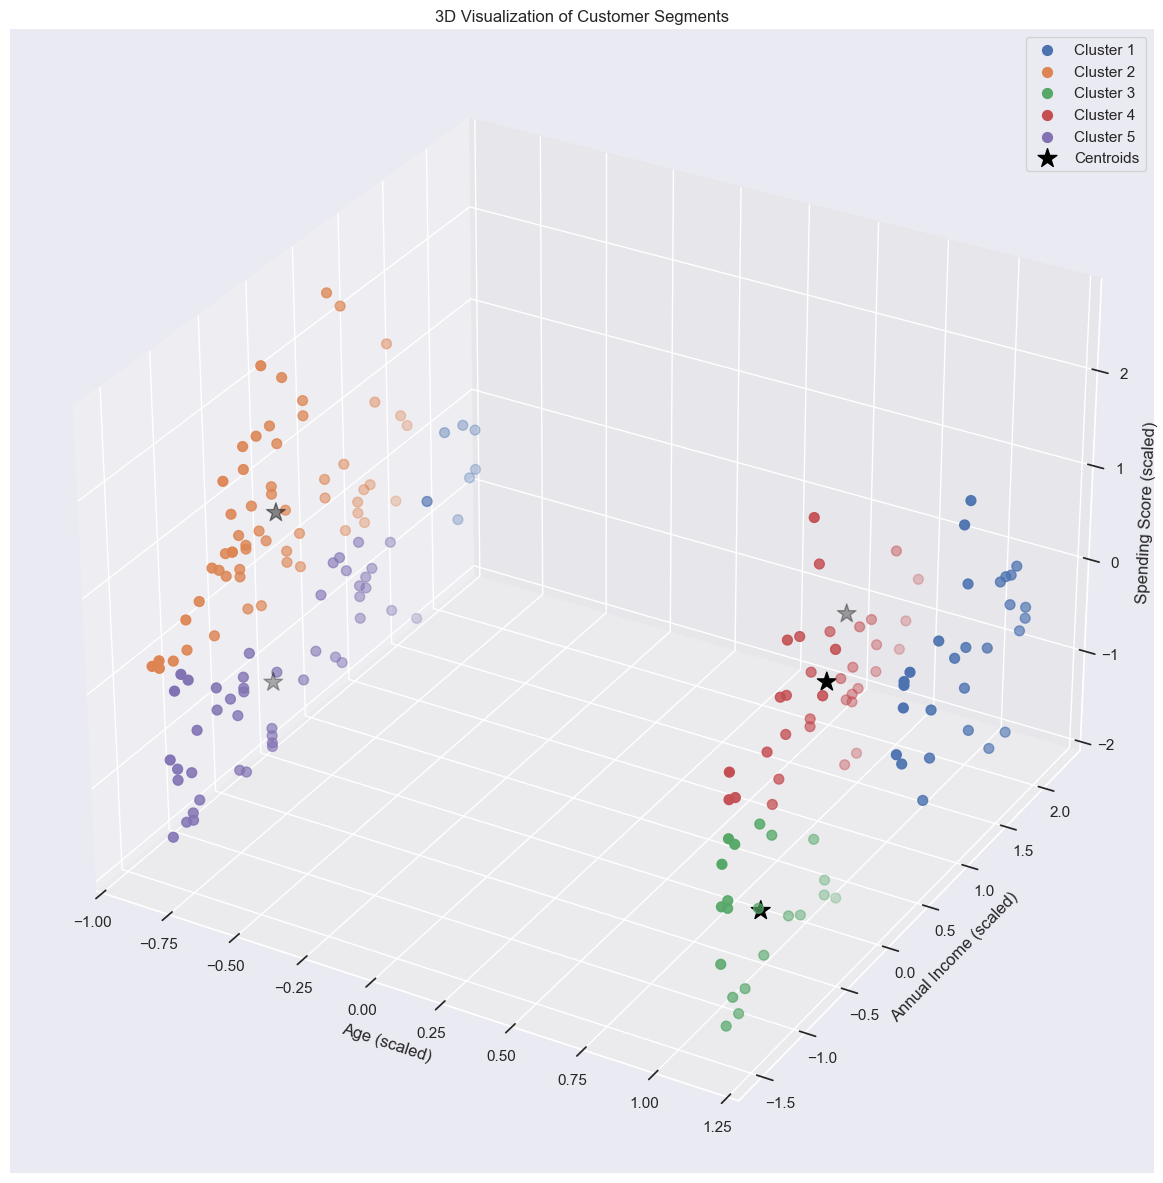


Cluster-wise averages:
           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        60.11               51.86                   40.36
1        36.57               79.33                   52.88
2        24.38               36.81                   60.05
3        34.65               80.59                   49.78
4        35.41               35.11                   50.35


In [82]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection="3d")

# Plot each cluster
for c in range(optimal_k):
    ax.scatter(
        X_scaled[Y == c, 0],
        X_scaled[Y == c, 1],
        X_scaled[Y == c, 2],
        s=50,
        label=f"Cluster {c+1}",
    )

# Plot centroids
centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:,1], centers[:,2], s=200,c='black', marker="*", label="Centroids")

ax.set_title("3D Visualization of Customer Segments")
ax.set_xlabel("Age (scaled)")
ax.set_ylabel("Annual Income (scaled)")
ax.set_zlabel("Spending Score (scaled)")
ax.legend()
plt.tight_layout()
plt.show()

# Cluster Summary
print("\nCluster-wise averages:")
print(df.groupby("Cluster")[features].mean().round(2))